
<H2>BACKGROUND Dataset and Clients: </H2>
SportsStats
(Olympics Dataset - 120 years of data)

SportsStats is a sports analysis firm partnering with local news and elite personal trainers to provide “interesting” insights to help their partners.  Insights could be patterns/trends highlighting certain groups/events/countries, etc. for the purpose of developing a news story or discovering key health insights.

<H2>STEP 1: Steps to import and clean the data.</H2>

We will use Jupyter Notebook to load and clean data, with the aid of python and migical sql with visualization to explain the foundings 

In [4]:
import numpy as np # Data manipulation
import pandas as pd # Numerical operations
import matplotlib.pyplot as plt # Plotting and visualization
import seaborn as sns # Statistical data visualization
import warnings  # Suppress warnings
warnings.filterwarnings("ignore")

In [5]:
# Read CSV
csv_path = '/Users/kammiehui/Jupyter Notebook/DataSet/SportsStats/athlete_events.csv'
df = pd.read_csv(csv_path)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<H3>Check dataset size and columns anmes after strip to snake case</H3>

In [7]:
print(f"DataFrame Shape(rows, columns) = {df.shape}")
print(df.columns)

DataFrame Shape(rows, columns) = (271116, 15)
Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')


<H3>Check Null Values</H3>

In [9]:
def data_overview(df, sort_by='Null %', ascending=False):
    summary=[]
    for col in df.columns:
        col_dtype = df[col].dtype
        unique_vals= df[col].nunique()
        null_vals = df[col].isnull().sum()
        total_vals = len(df)
        null_pct = round((null_vals / total_vals) * 100, 2)

        summary.append([
            col,
            col_dtype,
            unique_vals,
            null_vals,
            null_pct
        ])
        
    df_summary = pd.DataFrame(
        summary,
        columns = ['Column', 'Data Type', 'Unique Values', 'Null Values', 'Null %']
    )

    df_summary = df_summary.sort_values(by=sort_by, ascending=ascending)

    return df_summary
data_overview(df)


        

,Column,Data Type,Unique Values,Null Values,Null %
14,Medal,object,3,231333,85.33
5,Weight,float64,220,62875,23.19
4,Height,float64,95,60171,22.19
3,Age,float64,74,9474,3.49
0,ID,int64,135571,0,0.00
1,Name,object,134732,0,0.00
2,Sex,object,2,0,0.00
6,Team,object,1184,0,0.00
7,NOC,object,230,0,0.00
8,Games,object,51,0,0.00


<h3>Handle duplicated values</h3>

In [11]:
duplicated_rows = df.duplicated().sum()
print(f"\nTotal duplicated rows: {duplicated_rows}")


Total duplicated rows: 1385


In [176]:
duplicated_rows = df[df.duplicated()].sort_values(by='ID', ascending=True)
duplicated_rows.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Binary
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,0
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,0
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,0
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,0
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,0


In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
#Check again the size of data after remove duplicates
print(f"DataFrame Shape(rows, columns) = {df.shape}")

DataFrame Shape(rows, columns) = (269731, 15)


<h3>Describe data by python <code>df.describe()</code></h3>

In [16]:
df.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<H3>Null Values breakdown</H3>
1) medal..............85.33% <br>
2) weight.............23.19%<br>
3) height.............22.19%<br>
4) age................3.49%<br>
<br>
1) we may need more investigation before decide what to do next.
2) & 3 ) we want to keep this column for further analysis. we can consider using the ways of Group-Based Imputation – Fill missing values based on related features (e.g., fill by category means).<br>
The best way we can consider is to use the <b>sports</b> as category. we can assume the height and weight will be more closer on the same game. Athletes competing in the same Olympics tend to have similar physical attributes based on era, training standards, and conditions.<br> 
4) Age we will take the mean age of whole data set to replace nan value.

<h3>we are going to replace the missing age with mean age in python</h3>

In [19]:
avg_age = round(df['Age'].astype('float').mean(axis=0),0)
print(f"Mean Age is : {avg_age}")
df['Age'].replace(np.nan,avg_age, inplace =True)

Mean Age is : 25.0


In [20]:
#check again the replacement is valid
df['Age'].isnull().sum()

0

<H3> ERD Diagram</H3>

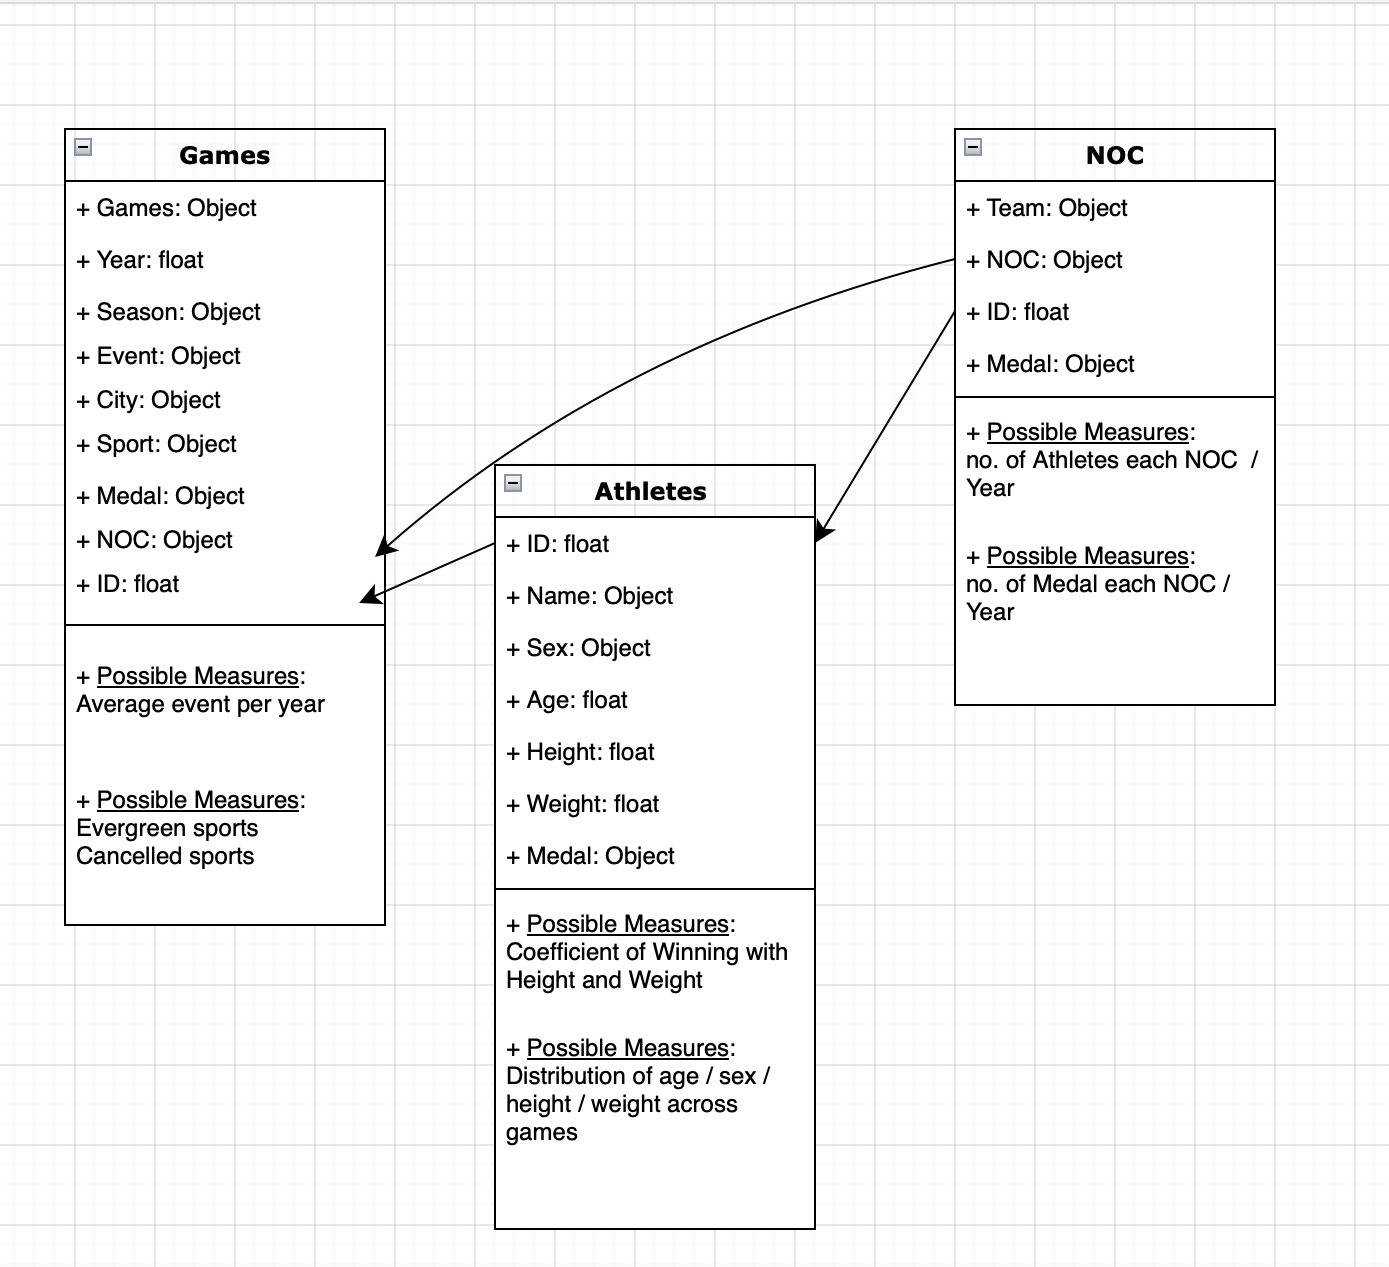

In [22]:
from IPython.display import Image
Image(filename='draw1.png')

<h3>🔹 Initial Hypothesis about the data</h3>

- Female athlete participation has significantly increased in traditionally male-dominated sports post-2000.<br>
- Athletes with above-average height and weight are more likely to medal in power or strength-based sports like weightlifting or rowing.<br>
- Wealthier or historically dominant Olympic nations (e.g., USA, China, Russia) consistently outperform smaller countries in terms of medal count across most disciplines


<h3>🔹 Approach</h3> <br>
<h4>To begin testing these hypotheses, I will perform a basic check on <b>overall years distribution</b>. Which include: - </h4>

- number of NOC join 
- number of events held
- number of athletes join

<h4>Explore outliers with boxplot and histogram for the numeric field of:-</h4> 

- age 
- weight
- height

<h4>Relationship that exists that you want to explore?</h4>

- Generate a stacked barchart to show the female particpaintion over the years <br>
- Explore any sport with significant increase of female athletes participation in last 20 years ( by sql / python)
- Use Logistic Regression analysis to see if height / weight/ age contribute to Winning in the Olumpic games 
- Find out if specific countries will constantly perform good in certain games

<H3>Overview of all years participation metrics</H3>

This analysis presents three line charts spanning 120 years, illustrating trends in:
- The number of sports featured in the Olympics
- The number of events held
- The number of National Olympic Committees (NOCs) participating <br>

There are a few insight here. <br>
1. Alternating Olympic Cycles: Since 1994, the Summer and Winter Olympic Games have been scheduled separately, alternating every two years. As a result, the participation metrics follow an up-and-down pattern, reflecting the staggered timing of Summer and Winter editions.
2. Steady Growth in Events: Both Summer and Winter Games have shown a gradual upward trend in the number of events hosted, demonstrating the continued expansion of the Olympics.
3. Increasing Global Participation: The number of NOCs joining the Olympics has consistently risen over time for both Summer and Winter Games, signaling the growing inclusivity and global reach of the event.

In [178]:
df_met = df[['Sport', 'Event', 'NOC', 'Year']].dropna()

# Compute unique counts for each column grouped by 'Year'
df_metric_count = df_met.groupby('Year').nunique()
print(df_metric_count.head())


      Sport  Event  NOC
Year                   
1896      9     43   12
1900     20     90   31
1904     18     95   15
1906     13     74   21
1908     24    109   22


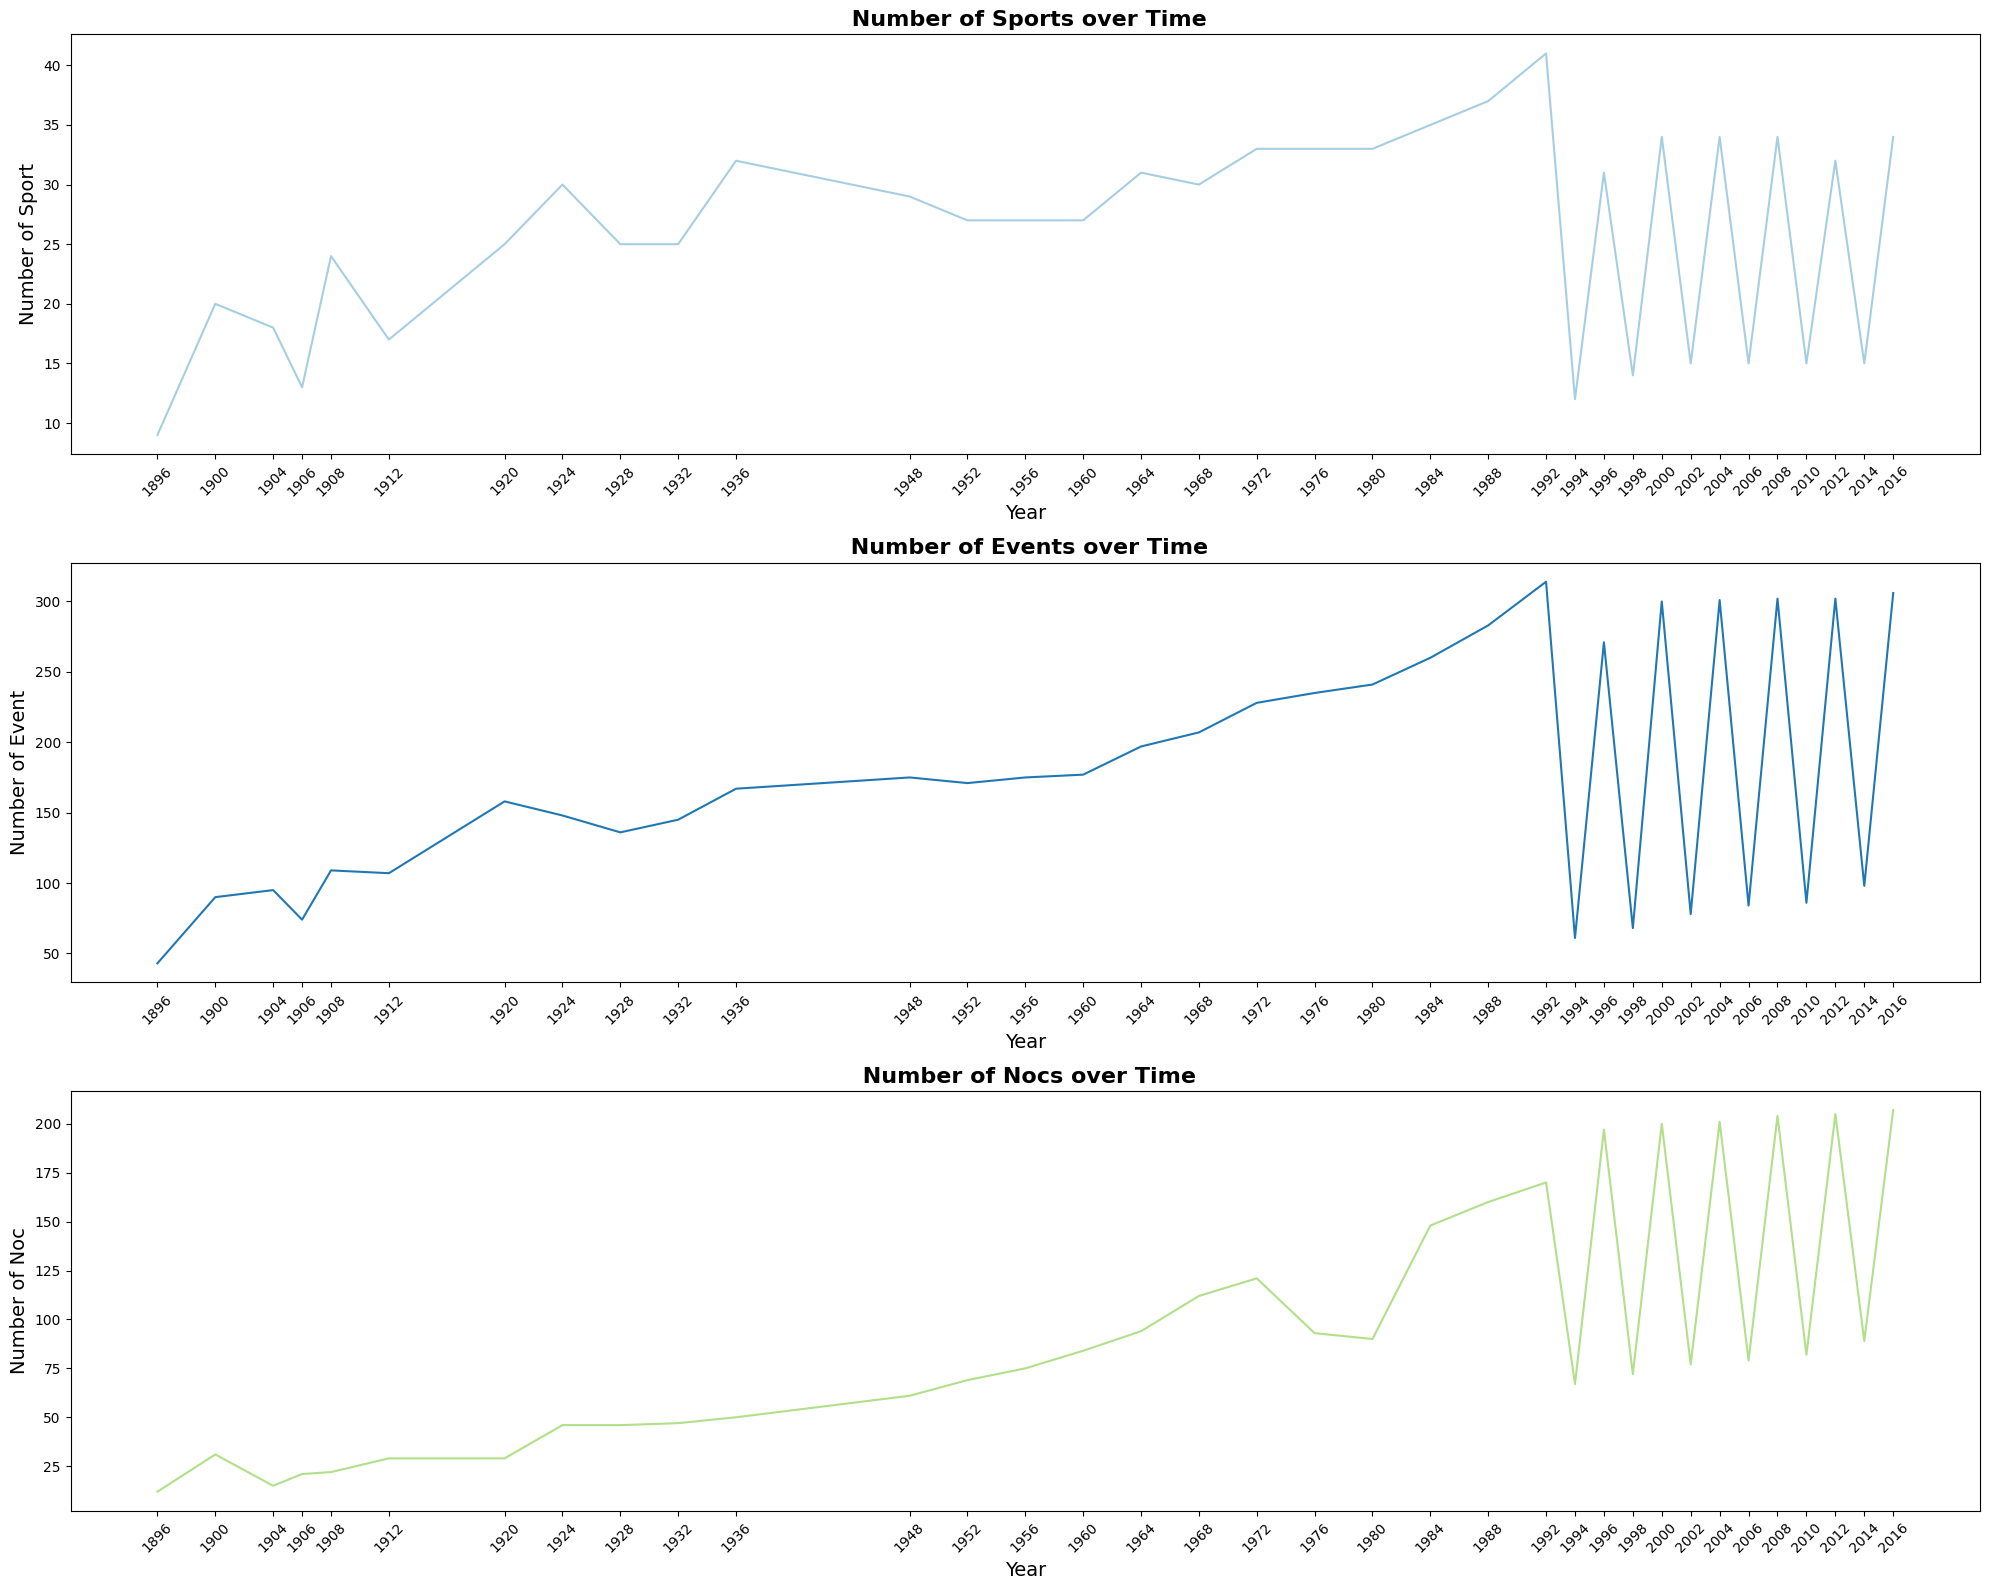

In [26]:
# Define columns
columns = ['Sport', 'Event', 'NOC']
df_met = df[['Sport', 'Event', 'NOC', 'Year']].dropna()
df_metric_count = df_met.groupby('Year').nunique()


# Set up subplots — one row, 3 plots
fig, axes = plt.subplots(3, 1, figsize=(20, 16))

# Define color palette
colormap = sns.color_palette("Paired") 

# Loop over each metric column
for i, col in enumerate(columns):
    sns.lineplot(
        data=df_metric_count, 
        x=df_metric_count.index,
        y= col,
        ax= axes[i],
        color = colormap[i])

# Annotation Details 
    axes[i]. set_title(f" Number of {col.title()}s over Time", fontsize=16, fontweight="bold")
    axes[i]. set_xlabel("Year", fontsize=14)
    axes[i]. set_ylabel(f"Number of {col.title()}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticks(df_metric_count.index)

# Show all x-ticks
plt.tight_layout()
plt.savefig("linechart_1.png", dpi=300, bbox_inches='tight') 
plt.show()

<h3>Overview of numeric metrics of all Year</h3>

Using boxplots, we explore the distribution of age, height, and weight across all Olympic years, analyzing key statistics such as mean, minimum, maximum values, and outliers.<br>

<h4>Key Observations:</h4>
📌 Age Trends:<br>
The average age of athletes is around 25.06 years, but there are exceptional athletes competing well into their 40s, 50s, and even 70s.<br>
📌 Height Distribution:<br>
The average height of athletes is 175 cm, yet some competitors stand below 150 cm or soar past 220 cm, highlighting the diversity of body types in different sports.<br>
📌 Weight Variation:<br>
The average weight is 75 kg, but extreme outliers exist, with some athletes weighing below 40 kg while others exceed 200 kg.<br>
These insights showcase the wide range of physical attributes among Olympic athletes, reflecting the unique demands of various sports and disciplines.<br>

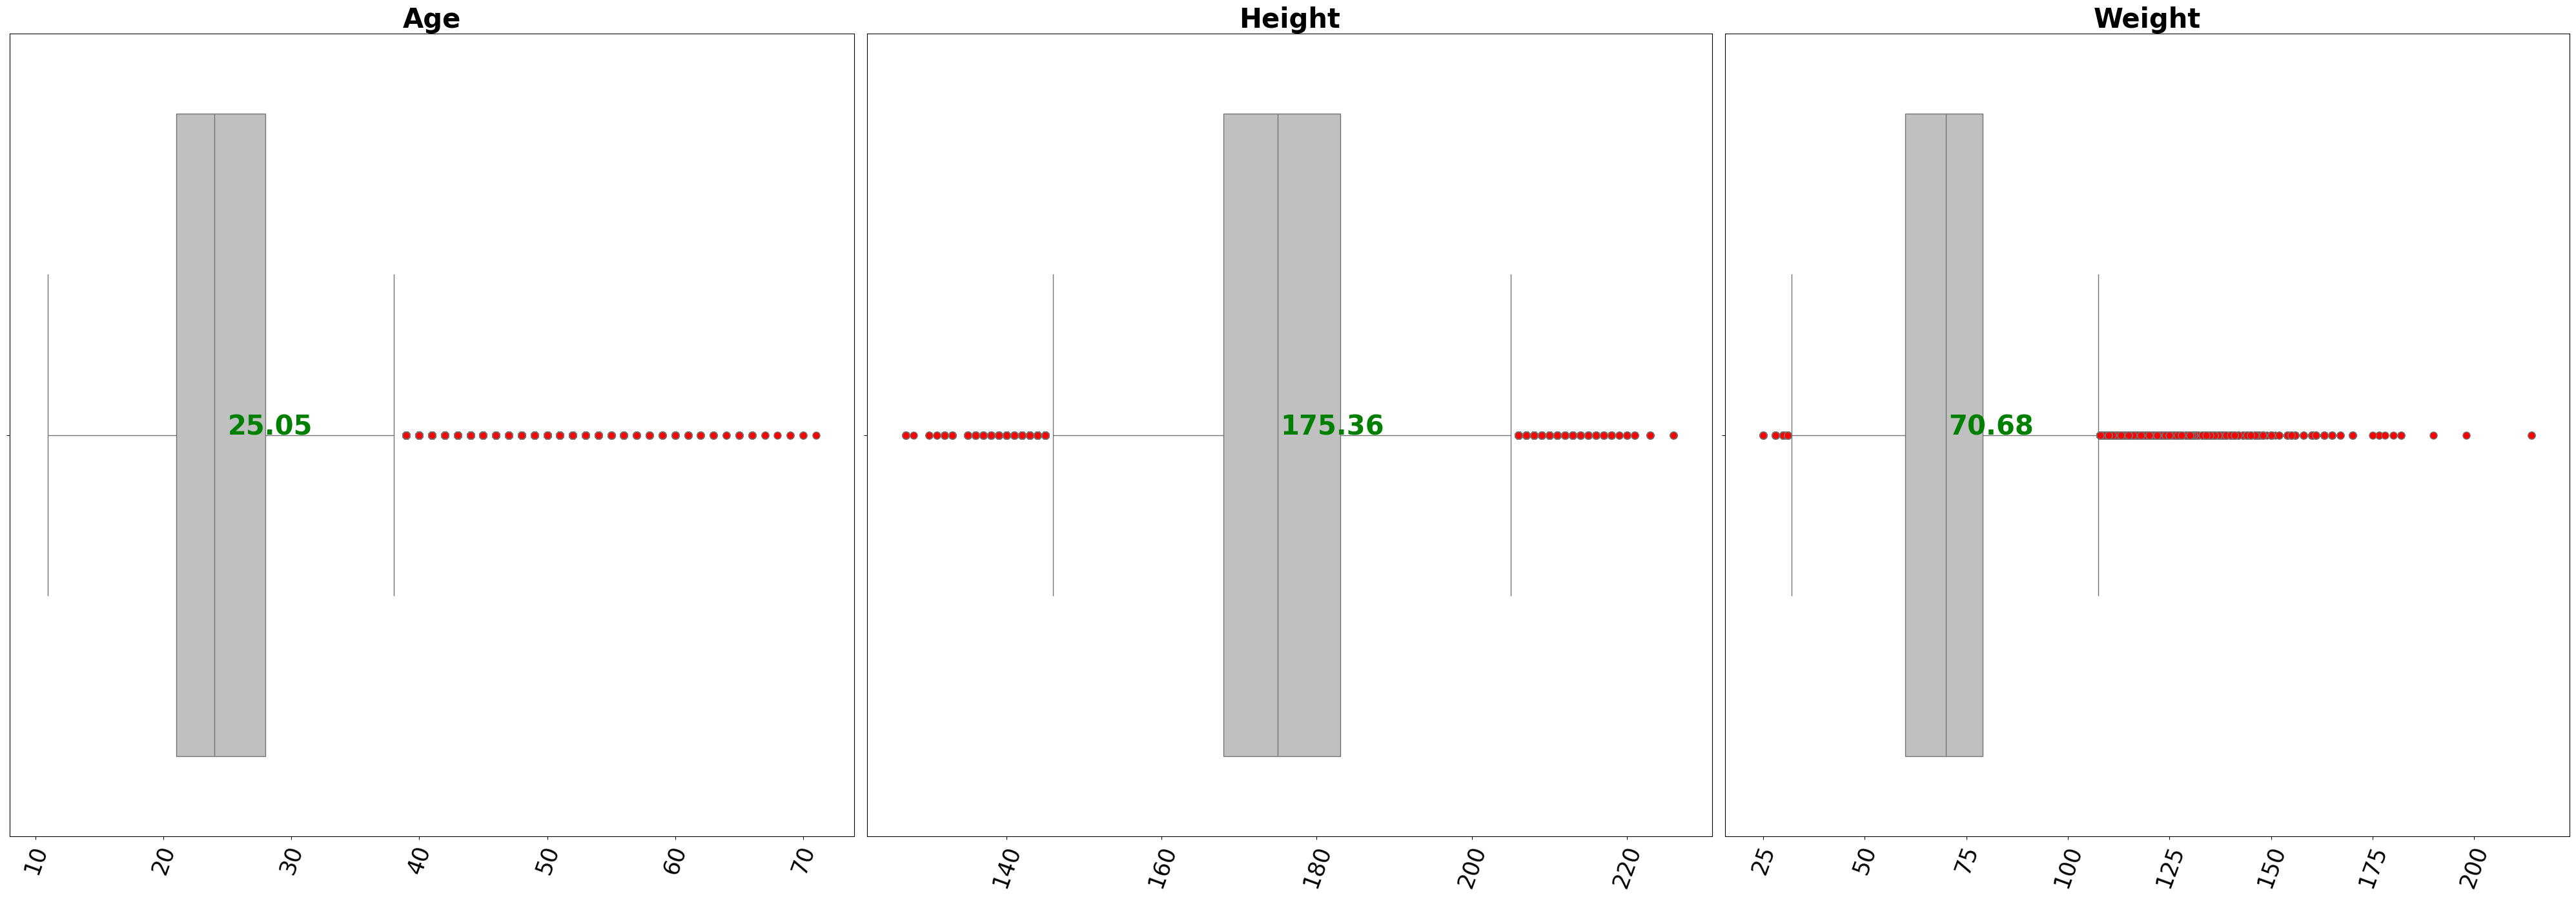

In [28]:
## FIND OUT MIN MAX HEIGHT OF ALL YEAR

# Define the numeric dataset
flo_df = df[['Age','Height','Weight']].dropna()

# Define plot size
fig = plt.figure(figsize = (40,40))

# Boxplot for flo columns
i = 1
for col in flo_df.columns:
    plt.subplot(3,3,i)
    ax = sns.boxplot(data = flo_df, x = flo_df[col], palette = ['silver'],
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=8)) # Highlights outliers in red

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))  # Rounds labels to whole numbers
    
    ax.set(xlabel = None, ylabel= None)
    plt.title(col,loc='center',fontsize=30, fontweight='bold')
    plt.xticks(rotation = 70, fontsize = 25)
    plt.yticks(fontsize=20)

    # Compute mean value
    mean_val = flo_df[col].mean()
    
    # Annotate mean value
    plt.text(mean_val, 0, f"{mean_val:.2f}", color="green", fontsize=30, fontweight='bold') 
   
    legend = ax.get_legend()
    if legend:
        for text in legend.get_texts():
            text.set_fontsize(20)
    i+=1

    
# Adjust layout to prevent overlapping subplots    
plt.tight_layout()

# Save image before show plot 
plt.savefig("Boxplot.png", dpi=300, bbox_inches='tight')  
plt.show()

<h3>Visualizing the Growth of Female Participation in the Olympics</h3>

Using Python, we generate two key datasets and combine them into a dual-axis chart for a comprehensive view of participation trends:<br>
📊 Stacked Bar Chart – Total male and female athlete participation per Olympic year.<br>
📈  Line Chart – Percentage of female athletes over time. <br>

Key Insights:<br>
👟 A Reflection of Social Evolution: The participation of female athletes in the Olympics mirrors broader societal changes and the progression toward gender equality in sports.
📈 Historical Growth of Female Representation:<br>
1896: Almost 0% female participation.<br>
1932: Increased to 10%.<br>
1968: Surpassed 20%.<br>
1992: Reached 30%.<br>
2004: Climbed to 40%.<br>
2016: Nearly 45% female participation, marking a significant milestone in Olympic history.<br>

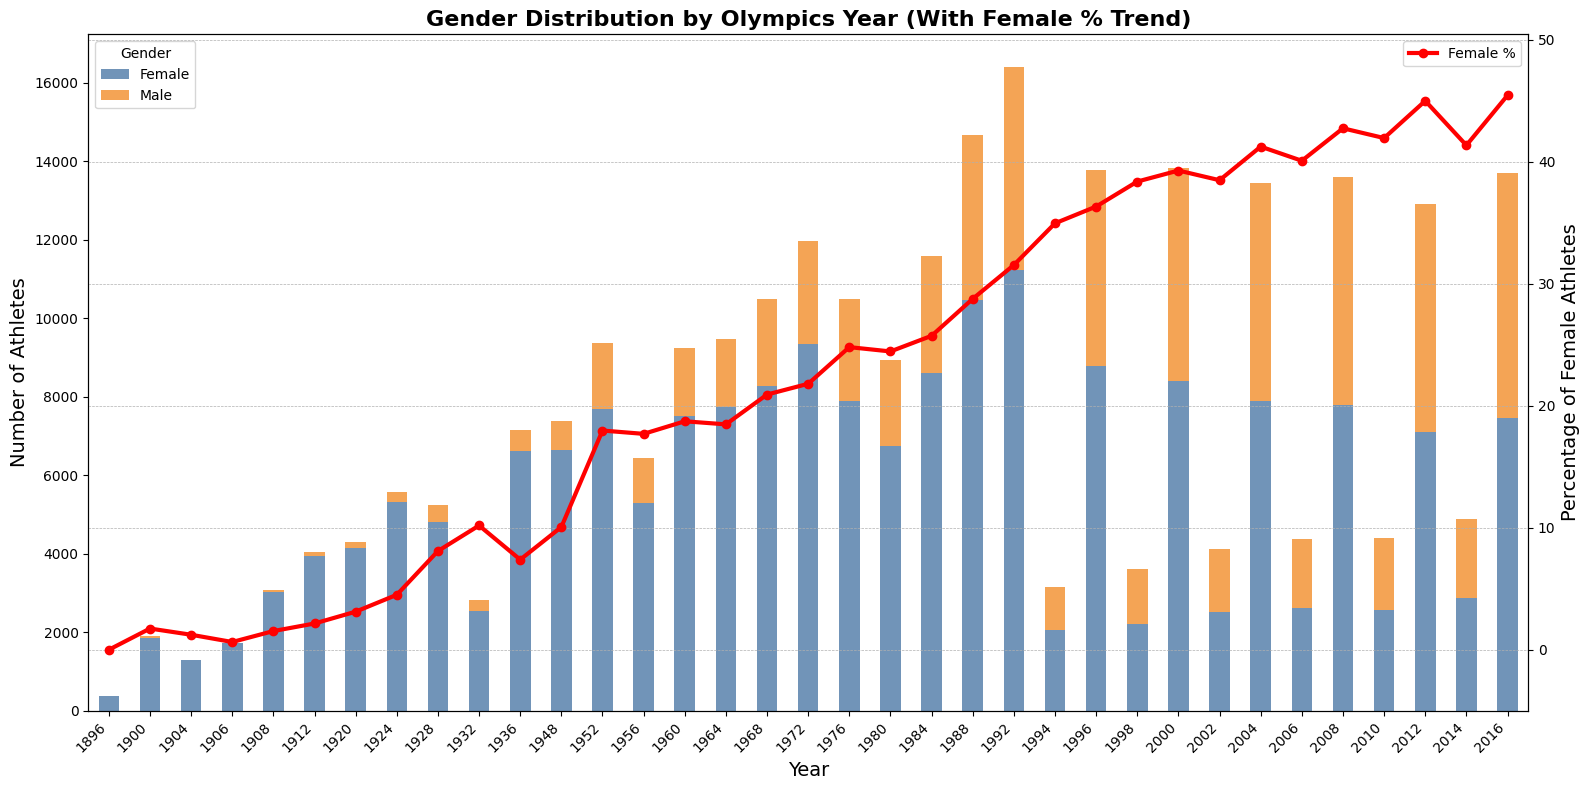

In [30]:
# Define data 
df_sex_grouped = df.groupby(["Year", "Sex"]).size().unstack(fill_value=0)

# Calculate percentage of female athletes per year
df_sex_grouped['Total'] = df_sex_grouped['M'] + df_sex_grouped['F']
df_sex_grouped['Female_Percentage'] = (df_sex_grouped['F'] / df_sex_grouped['Total']) * 100
df_sex_grouped = df_sex_grouped.reset_index()


fig, ax1 = plt.subplots(figsize=(16,8))

# Define color palette
colormap = ['#4E79A7', '#F28E2B']  # Example colors for Male/Female

# Stacked Bar Chart (Primary Y-Axis)
df_sex_grouped[['M', 'F']].plot(kind='bar', stacked=True, ax=ax1, color=colormap, alpha=0.8)
ax1.set_ylabel("Number of Athletes", fontsize=14)
ax1.set_xlabel("Year", fontsize=14)

# Explicitly set x-ticks to ensure visibility
ax1.set_xticks(range(len(df_sex_grouped)))
ax1.set_xticklabels(df_sex_grouped['Year'].astype(int), rotation=45, ha='right')

# Secondary Y-Axis for Female Percentage
ax2 = ax1.twinx()
ax2.set_ylim(df_sex_grouped['Female_Percentage'].min() - 5, 
             df_sex_grouped['Female_Percentage'].max() + 5)

ax2.plot(df_sex_grouped.index, df_sex_grouped['Female_Percentage'], 
         color='red', marker='o', linewidth=3, linestyle='solid', label="Female %")


ax2.set_ylabel("Percentage of Female Athletes", fontsize=14)


# Ensure Legends & Styling
ax1.legend(title="Gender", labels=['Female', 'Male'], loc='upper left') # Order matches column order
ax2.legend(loc='upper right')
plt.title("Gender Distribution by Olympics Year (With Female % Trend)", fontsize=16, fontweight="bold")

plt.tight_layout()  # Add this to prevent labels from overlapping
plt.grid(True, which ='both', linestyle='--',linewidth=0.5)
plt.savefig("StackedBar_DualAxis_Line.png", dpi=300, bbox_inches='tight')
plt.show()

<h3>Sports with Significant Growth in Female Participation (1996–2016) </h3>

Both SQL and Python analysis have aligned, revealing the top three sports that experienced the most substantial increase in female athlete participation over the last two decades:<br>
🥇 Cycling – 66.88% increase <br>
🥈 Synchronized Swimming – 63.89% increase <br>
🥉 Football – 63.71% increase<br>
These trends highlight the expanding opportunities for female athletes in traditionally male-dominated sports, reflecting broader shifts in societal attitudes, funding, and accessibility.

In [32]:

# Defined Time Window
start_year = 1996
end_year = 2016

# Filter data for limited time window
df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Count female athletes per sport per year
female_counts = df_filtered[df_filtered['Sex'] == 'F'].groupby(['Year', 'Sport']).size().reset_index(name='FemaleCount')

# Get female counts for the 1996
first_year_counts = female_counts[female_counts['Year'] == start_year].set_index('Sport')['FemaleCount'].fillna(0)

# Get female counts for the 2016
last_year_counts = female_counts[female_counts['Year'] == end_year].set_index('Sport')['FemaleCount'].fillna(0)

# Calculate the increase and percentage increase
percentage_increase = ((last_year_counts - first_year_counts) * 100)/ first_year_counts
percentage_increase = percentage_increase.loc[first_year_counts[first_year_counts > 0].index]
percentage_increase = percentage_increase.sort_values(ascending = False)
percentage_increase = round(percentage_increase,2)

# Display the sports with the most significant percentage increase
print(f"Sports with significant increase in female athlete participation between {start_year} and {end_year}:")
print(percentage_increase.head(10))



Sports with significant increase in female athlete participation between 1996 and 2016:
Sport
Cycling                  66.88
Synchronized Swimming    63.89
Football                 63.71
Sailing                  63.00
Hockey                   51.56
Handball                 49.15
Diving                   41.27
Athletics                34.82
Beach Volleyball         33.33
Equestrianism            28.43
Name: FemaleCount, dtype: float64


<h3>Try in SQL to verified if the result is correct </h3>

In [34]:
%pip install prettytable==3.6.0 --quiet

Note: you may need to restart the kernel to use updated packages.


In [35]:
%load_ext sql
%sql sqlite:///athletes.db

import pandas as pd
from sqlalchemy import create_engine

# Load CSV into file-based SQLite DB
csv_path = '/Users/kammiehui/Jupyter Notebook/DataSet/SportsStats/athlete_events.csv'
df = pd.read_csv(csv_path)

engine = create_engine('sqlite:///athletes.db')
df.to_sql('athlete_events', con=engine, index=False, if_exists='replace')

271116

In [36]:
%%sql
WITH FemaleParticipation AS (
    SELECT 
        Year, 
        Sport,
        SUM(CASE WHEN Sex IS 'F' THEN 1 ELSE 0 END) AS FemaleCount
    FROM athlete_events
    WHERE Year >= 1996
    GROUP BY Year, Sport
),
FirstYearCount AS (
    SELECT 
        Sport,
        FemaleCount As FirstYearFemaleCount
    FROM 
        FemaleParticipation
    WHERE
        Year = 1996
),
LastYearCount AS (
    SELECT 
        Sport,
        FemaleCount As LastYearFemaleCount
    FROM 
        FemaleParticipation
    WHERE
        Year = 2016
)
SELECT 
    ly.Sport,
    fy.FirstYearFemaleCount,
    ly.LastYearFemaleCount,
    ROUND(CAST((ly.LastYearFemaleCount - fy.FirstYearFemaleCount)AS REAL) * 100 / fy.FirstYearFemaleCount,2) AS PercentageIncrease
FROM 
    LastYearCount ly
JOIN 
    FirstYearCount fy ON ly.Sport = fy.Sport
WHERE
    fy.FirstYearFemaleCount > 0 
ORDER BY 
    PercentageIncrease DESC
LIMIT 10 
    


 * sqlite:///athletes.db
Done.


Sport,FirstYearFemaleCount,LastYearFemaleCount,PercentageIncrease
Cycling,160,267,66.88
Synchronized Swimming,72,118,63.89
Football,124,203,63.71
Sailing,100,163,63.0
Hockey,128,194,51.56
Handball,118,176,49.15
Diving,63,89,41.27
Athletics,896,1208,34.82
Beach Volleyball,36,48,33.33
Equestrianism,102,131,28.43


<h3>Does an Athlete's Age, Height, and Weight Influence Their Chances of Winning a Medal?</h3><br>

To explore this, we conducted two analyses using Logistic Regression: <br>
1️⃣ Overall Analysis – Examining whether age, height, and weight impact medal likelihood across all sports. <br>
2️⃣ Sport-Specific Analysis – Focusing on Basketball, Volleyball, Netball, Fencing, Swimming, Rowing, and Tennis to see if physical attributes play a significant role in these disciplines. <br>
Findings:<br>
🔎 Both attempts revealed very low correlation between an athlete’s body build and age and their likelihood of winning a medal.<br>
➡️ This suggests that factors beyond physical attributes, such as skill, strategy, training, and competition dynamics, might be more influential in securing Olympic success.<br>


In [38]:
flo_df = df[['Age','Height','Weight','Year']].dropna()
corr_matrix = flo_df.corr(method="pearson")
print(corr_matrix)

             Age    Height    Weight      Year
Age     1.000000  0.141684  0.212041  0.089142
Height  0.141684  1.000000  0.796573  0.048142
Weight  0.212041  0.796573  1.000000  0.022175
Year    0.089142  0.048142  0.022175  1.000000


<h3> We will try to use Logistic Regression to see further realationship </h3>

In [40]:
# Filter Medal Awarded dataset 
df['Medal_Binary'] = df['Medal'].notna().astype(int)

# Define X and y 
X = df[['Age', 'Height', 'Weight', ]]
print(X[0:5])  #print the first 5 values
y = df['Medal_Binary']

X = X.dropna()
print(X[0:5]) # confirm the changes
y = y.loc[X.index]  # Keep only corresponding rows

    Age  Height  Weight
0  24.0   180.0    80.0
1  23.0   170.0    60.0
2  24.0     NaN     NaN
3  34.0     NaN     NaN
4  21.0   185.0    82.0
    Age  Height  Weight
0  24.0   180.0    80.0
1  23.0   170.0    60.0
4  21.0   185.0    82.0
5  21.0   185.0    82.0
6  25.0   185.0    82.0


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [42]:
## It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. 
## We may make use of StandardScalar function in the Scikit-Learn library.

X_norm = StandardScaler().fit(X).transform(X) 
X_norm[0:5]

array([[-0.19250283,  0.43884154,  0.64933516],
       [-0.37488199, -0.50937965, -0.7453355 ],
       [-0.73964031,  0.91295214,  0.78880222],
       [-0.73964031,  0.91295214,  0.78880222],
       [-0.01012367,  0.91295214,  0.78880222]])

In [43]:
##### Splitting the dataset
## The trained model has to be tested and evaluated on data which has not been used during training. 
## Therefore, it is required to separate a part of the data for testing and the remaining for training. 
## For this, we may make use of the train_test_split function in the scikit-learn library.


X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

In [44]:
## Let's build the model using __LogisticRegression__ from the Scikit-learn package and fit our model with train data set.

LR = LogisticRegression().fit(X_train,y_train)

In [45]:
## Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. 
## Let us predict the  parameter for the test data set.
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.85133525, 0.14866475],
       [0.87422964, 0.12577036],
       [0.86591807, 0.13408193],
       [0.83066999, 0.16933001],
       [0.83772181, 0.16227819],
       [0.85854501, 0.14145499],
       [0.82042061, 0.17957939],
       [0.78323318, 0.21676682],
       [0.91875866, 0.08124134],
       [0.8555242 , 0.1444758 ]])

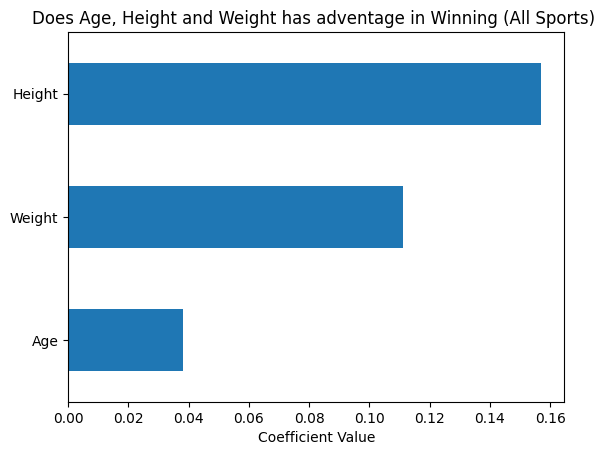

In [47]:
coefficients = pd.Series(LR.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')

plt.title("Does Age, Height and Weight has adventage in Winning (All Sports) ")
plt.xlabel("Coefficient Value")
plt.savefig("LR1.png", dpi=300, bbox_inches='tight')  
plt.show()

#### Generally, it seems age, height and weight does not giving the advantages on winning for all sport

### Now we are going to see if any specific sport height  with high advantage <br>

Here we select most people agreeed that sports with height advantage to further investigate

In [50]:
sports_subset = ['Basketball', 'Volleyball', 'Netball', 'Fencing', 'Swimming', 'Rowing', 'Tennis']
df_filtered = df[df['Sport'].isin(sports_subset)]
df_filtered.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal_Binary
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,0
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,0
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,0
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1


In [51]:
X1 = df_filtered[['Age', 'Height', 'Weight']]
print(X1[0:5])  #print the first 5 values
y1 = df_filtered['Medal_Binary']

X1 = X1.dropna()
print(f"data after dropna {X1[0:5]}")
y1 = y1.loc[X1.index]  # Keep only corresponding rows

     Age  Height  Weight
0   24.0   180.0    80.0
29  26.0     NaN     NaN
35  22.0     NaN     NaN
36  22.0     NaN     NaN
37  30.0     NaN     NaN
data after dropna       Age  Height  Weight
0    24.0   180.0    80.0
92   26.0   189.0    72.0
93   30.0   189.0    72.0
100  21.0   194.0    78.0
101  21.0   194.0    78.0


In [52]:
X1_norm = StandardScaler().fit(X1).transform(X1) 
X1_norm[0:5]

array([[ 0.10429221, -0.11312917,  0.42669583],
       [ 0.50752024,  0.72332657, -0.19128631],
       [ 1.31397632,  0.72332657, -0.19128631],
       [-0.50054985,  1.18802421,  0.2722003 ],
       [-0.50054985,  1.18802421,  0.2722003 ]])

In [53]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1_norm, y1, test_size=0.2, random_state=4)
LR = LogisticRegression().fit(X1_train,y1_train)
## Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. 
## Let us predict the  parameter for the test data set.
yhat1 = LR.predict(X1_test)
yhat1[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

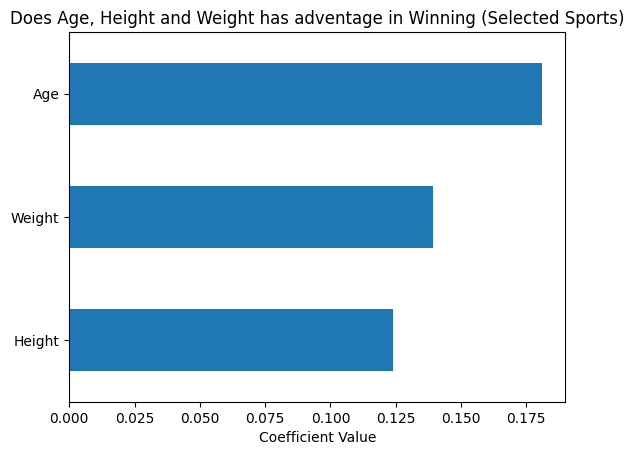

In [54]:
coefficients = pd.Series(LR.coef_[0], index=X1.columns)
coefficients.sort_values().plot(kind='barh')

plt.title("Does Age, Height and Weight has adventage in Winning (Selected Sports)")
plt.xlabel("Coefficient Value")
plt.savefig("LR2.png", dpi=300, bbox_inches='tight') 
plt.show()

<h3>It seems Height Weight and Age are less likely the answer to the winning</h3>

<H3>Do Certain Countries or Regions Consistently Produce More Medal-Winning Athletes in Specific Disciplines?</H3> 

To explore patterns of national dominance in Olympic sports, we analyze the top five disciplines with the highest number of medal-winning athletes. Our goal is to identify whether specific countries consistently produce champions or exhibit a progressive increase in medal victories over time. This analysis helps uncover trends in athletic success, emerging contenders, and shifts in competitive dominance.


<h3>🔹 Approach</h3> 
<b>Data Extraction:</b><br>

- Using SQL, we identify the top five sports with the highest number of medal-winning athletes.
- We focus on the following sports: Athletics, Swimming, Rowing, Fencing, and Ice Hockey.

<h3>🔹Data Preparation:</h3> 

- The extracted data is transformed into a Pandas DataFrame for further analysis.

<h3>🔹Treemap Visualization:</h3> 

- A treemap illustrates the breakdown of medal counts by sport and country for the period 1988–2016.<br>
- This showcases accumulated medal totals per sport, providing insight into dominance by different nations.<br>

<h3>🔹Year-over-Year Medal Trends (1988–2016):</h3>

- We analyze the medal count progression in these five sports across Olympic years, highlighting shifts in dominance.<br>


<h3>🔹Key findings:</h3> 

- Swimming has been consistently dominated by the USA, with total medal counts rising from below 50 in 1988 to nearly 70 in 2016. This is twice the medal tally of the second-ranked nation (Australia) in 2016.<br>
- Athletics is also led by the USA, showing fluctuations in total medals each Olympic year but generally maintaining a 10+ medal advantage over the second-ranked nation.<br>
- Fencing lacks a clear dominant country. Italy (ITA) has occasionally taken the top spot, but its ranking dropped again in 2016.<br>
- Ice Hockey remains highly competitive, with a Canada-USA rivalry intensifying since 2010.<br>
- Rowing has seen Great Britain (GBR) rise steadily since 2000, with medal counts increasing from 15 to over 20 in recent years.<br>

In [57]:
%%sql
SELECT 
    Sport,
    NOC,
    COUNT(*) As Medal_Count
FROM athlete_events
WHERE Medal IS NOT NULL
GROUP BY Sport, NOC
ORDER BY Medal_Count DESC
LIMIT 10

 * sqlite:///athletes.db
Done.


Sport,NOC,Medal_Count
Athletics,USA,1080
Swimming,USA,1078
Swimming,AUS,401
Rowing,USA,375
Fencing,ITA,359
Ice Hockey,CAN,348
Basketball,USA,341
Athletics,GBR,338
Fencing,FRA,310
Gymnastics,URS,288


In [180]:
%%sql
WITH TopMedalistsBySport AS (
    SELECT
        Year,
        Sport,
        NOC,
        COUNT(*) AS Medal_Count,
        RANK() OVER (PARTITION BY Year, Sport ORDER BY COUNT(*) DESC) AS Rank
    FROM athlete_events
    WHERE Medal IS NOT NULL AND Year >=1988
      AND Sport IN ('Athletics', 'Swimming', 'Rowing', 'Fencing', 'Ice Hockey')
    GROUP BY Year, Sport, NOC
)
SELECT
    Year,
    Sport,
    NOC,
    Medal_Count,
    Rank
FROM TopMedalistsBySport
WHERE Rank <= 5
ORDER BY Year ASC, Sport ASC, Rank ASC
LIMIT 5
              

 * sqlite:///athletes.db
Done.


Year,Sport,NOC,Medal_Count,Rank
1988,Athletics,USA,40,1
1988,Athletics,URS,36,2
1988,Athletics,GDR,34,3
1988,Athletics,GBR,12,4
1988,Athletics,FRG,9,5


In [124]:
# Convert it into pd.datframe to get visualisation 
import pandas as pd
results = %sql WITH TopMedalistsBySport AS ( \
    SELECT \
        Year, \
        Sport, \
        NOC, \
        COUNT(*) AS Medal_Count, \
        RANK() OVER (PARTITION BY Year, Sport ORDER BY COUNT(*) DESC) AS Rank \
    FROM athlete_events \
    WHERE Medal IS NOT NULL AND Year >=1988 \
      AND Sport IN ('Athletics', 'Swimming', 'Rowing', 'Fencing', 'Ice Hockey') \
    GROUP BY Year, Sport, NOC \
) \
SELECT \
    Year, \
    Sport, \
    NOC, \
    Medal_Count, \
    Rank \
FROM TopMedalistsBySport \
WHERE Rank <= 5 \
ORDER BY Year ASC, Sport ASC, Rank ASC;


# Convert the ResultSet to a pandas DataFrame
top_medalists_df = results.DataFrame()

# Now 'top_medalists_df' is a pandas DataFrame
print(type(top_medalists_df))
print(top_medalists_df.head())



 * sqlite:///athletes.db
Done.
<class 'pandas.core.frame.DataFrame'>
   Year      Sport  NOC  Medal_Count  Rank
0  1988  Athletics  USA           40     1
1  1988  Athletics  URS           36     2
2  1988  Athletics  GDR           34     3
3  1988  Athletics  GBR           12     4
4  1988  Athletics  FRG            9     5


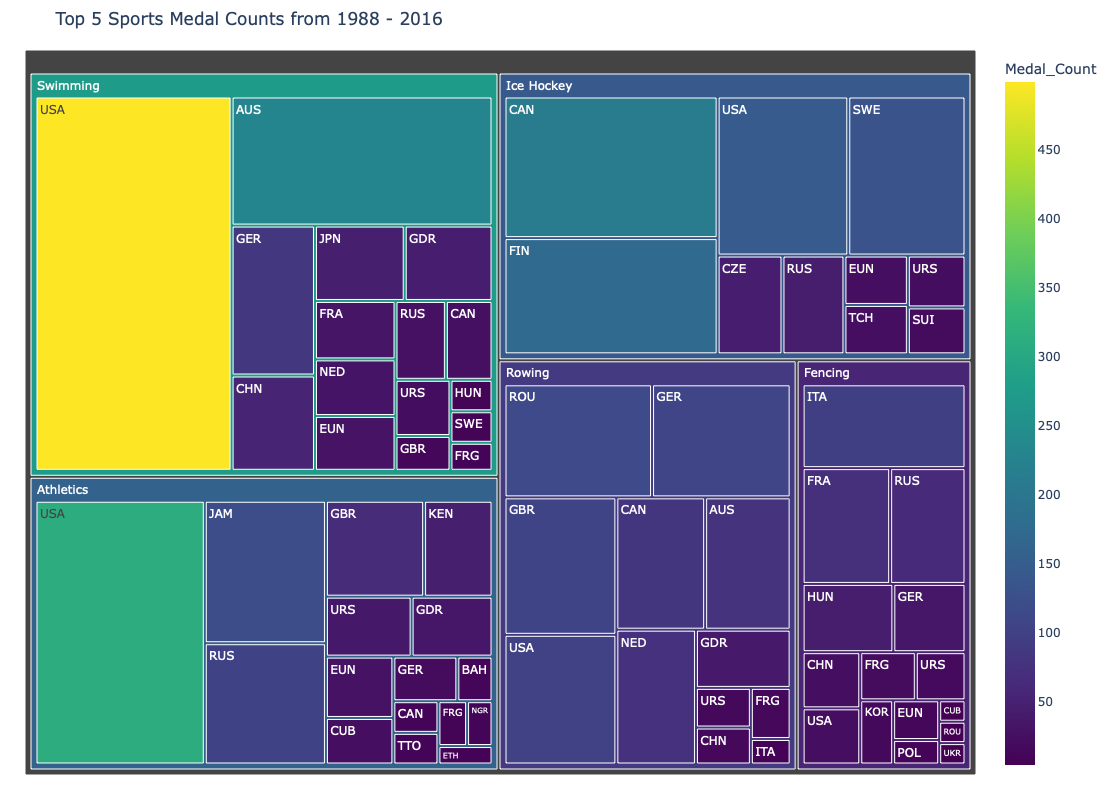

In [187]:
import plotly.express as px

# Aggregate medal counts by Sport and NOC
agg_df = top_medalists_df.groupby(["Sport", "NOC"])["Medal_Count"].sum().reset_index()

# Create treemap with continuous color mapping
fig = px.treemap(
    agg_df,
    path=["Sport", "NOC"],  # Hierarchy: Sport → NOC
    values="Medal_Count",
    color="Medal_Count",  # Use numeric values for gradient coloring
    color_continuous_scale="viridis",  # Apply continuous color scale
    title="Top 5 Sports Medal Counts from 1988 - 2016"
)

# Adjust figure layout for better display
fig.update_layout(
    width=1000,  # Set width in pixels
    height=800,  # Set height in pixels
    margin=dict(t=50, l=25, r=25, b=25)  # Improve spacing
)

plt.savefig("treemap.png", dpi=300, bbox_inches='tight') 
fig.show()



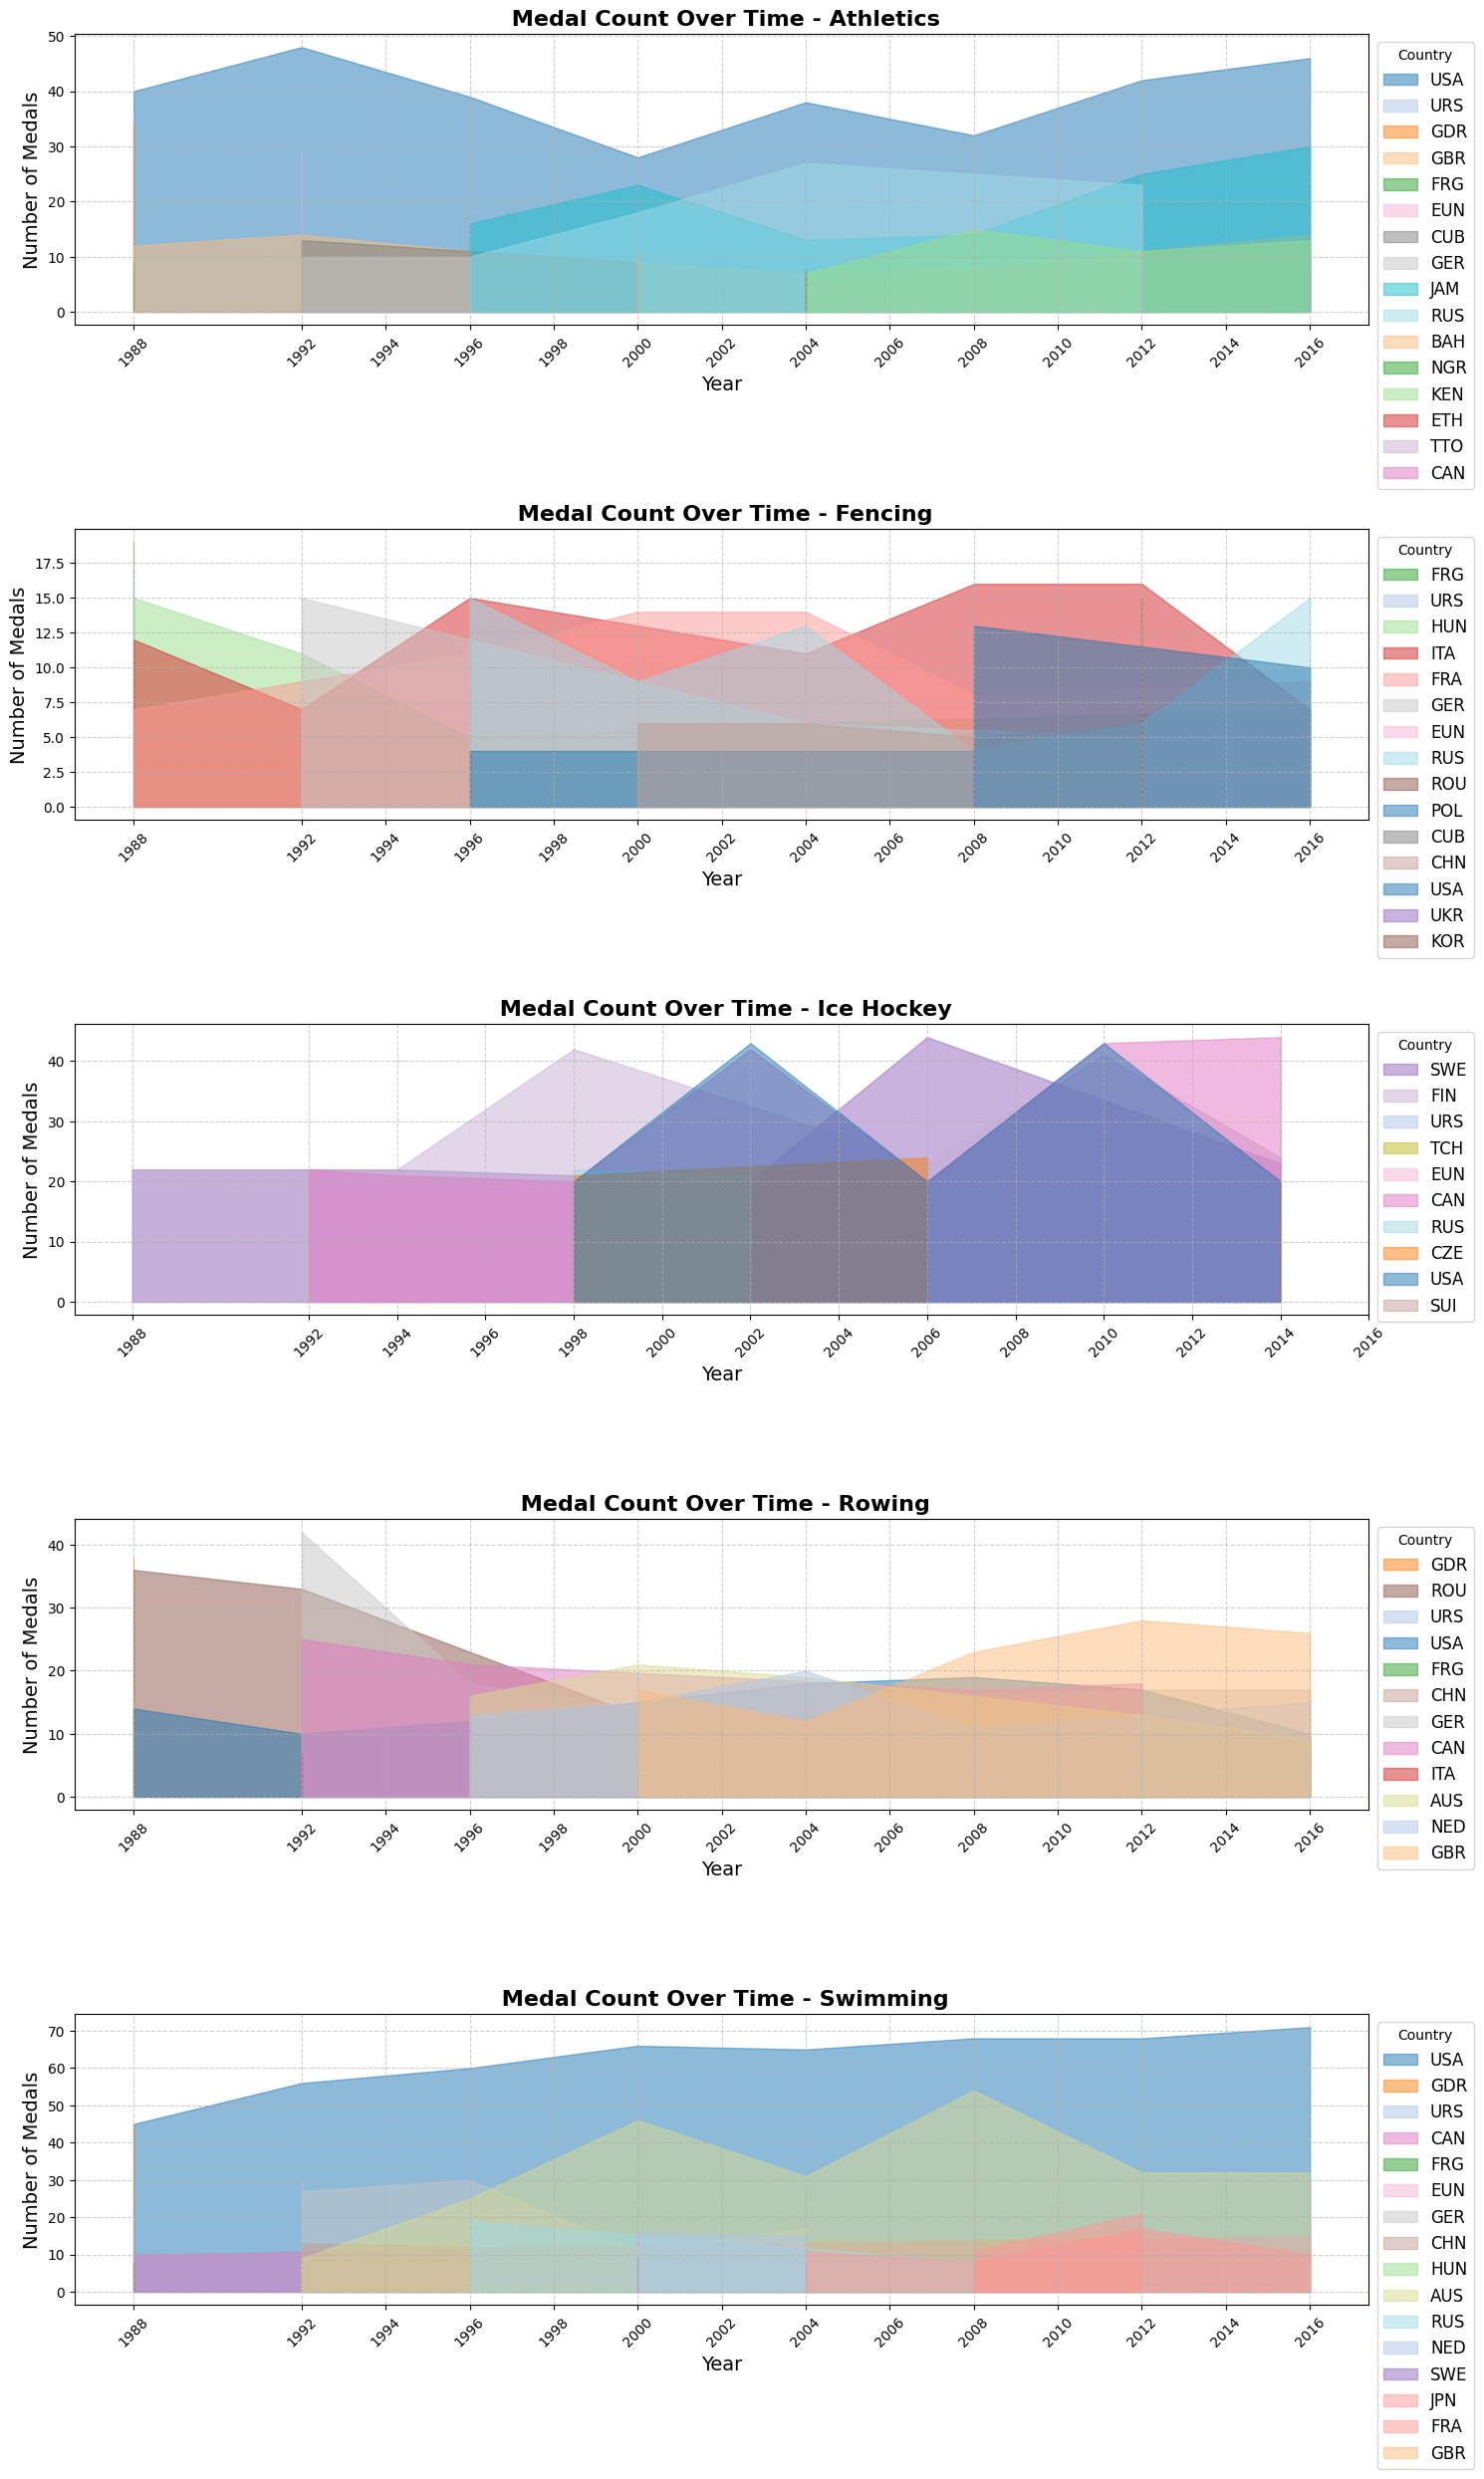

In [130]:
# Get unique sports
sports = top_medalists_df ['Sport'].unique()

# Set up subplots — one per sport
fig, axes = plt.subplots(len(sports), 1, figsize=(15, 5 * len(sports)), sharex= False)

# Define color palette
colormap = sns.color_palette("tab20", len(top_medalists_df["NOC"].unique())) 
country_colors = {noc: colormap[i] for i, noc in enumerate(top_medalists_df["NOC"].unique())}

# Loop over each sport and plot separately 
for i, sport in enumerate(sports):
    sport_df = top_medalists_df [top_medalists_df ['Sport']== sport] # Filter data
   
    
    # Plot area chart 
    
    for noc in sport_df["NOC"].unique():  # Separate by country
        noc_df = sport_df[sport_df["NOC"] == noc]
        axes[i].fill_between(noc_df["Year"], noc_df["Medal_Count"], alpha=0.5, label=noc, color=country_colors[noc])


# Annotation Details 
    axes[i]. set_title(f" Medal Count Over Time - {sport}", fontsize=16, fontweight="bold")
    axes[i]. set_xlabel("Year", fontsize=14)
    axes[i]. set_ylabel(f"Number of Medals", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)
    
# Show all x-ticks
    all_years = sorted(top_medalists_df["Year"].unique())  # Get all unique years
    axes[i].set_xticks(all_years)

# Add grid lines
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Add legend
    axes[i].legend(title="Country", fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))
    
# Show all x-ticks
plt.subplots_adjust(hspace=0.4)
plt.tight_layout()
plt.savefig("areachart_improved.png", dpi=300, bbox_inches='tight') 
plt.show()


---

## **🔹 Discuss Insights Discovered**
After diving deeper into the data, several noteworthy **patterns and trends** emerged that refine our understanding of Olympic success:  

### **Gender Representation in Sports**
- **Continued Growth of Female Participation:** As expected, female athlete participation in traditionally male-dominated sports increased significantly post-2000. The stacked bar chart validates this trend, showing a **steady upward trajectory**, reaching **45% representation** in 2016.  
- **Sports Leading Female Growth:** Cycling, synchronized swimming, and football saw the most substantial increase, indicating expanded opportunities, greater accessibility, and shifting cultural perceptions of women’s role in elite sports.  

### **Physical Attributes and Medal Success**
- Contrary to our initial hypothesis, **age, height, and weight showed low correlation** with medal victories. This suggests that **technical skill, training quality, and competitive strategy** play a much larger role in Olympic success than sheer physical build.  
- While strength-based sports like **weightlifting and rowing** showed a **slight advantage for athletes with higher weight/height**, the relationship wasn’t strong enough to be a universal predictor across all disciplines.  

### **National Dominance & Competitive Balance**
- **USA's Continued Dominance in Swimming & Athletics:** Both sports remain **heavily skewed toward American success**, with medal counts significantly ahead of second-place nations. However, fluctuations in **athletics** indicate that dominance isn't absolute—likely influenced by changing coaching methods, talent development, and global competition.  
- **Shifting Leadership in Other Sports:**  
  - **Fencing** lacks a clear dominant nation, with Italy experiencing **temporary leadership but later decline**. This suggests that **fencing success is more volatile** compared to swimming or athletics.  
  - **Ice Hockey** remains one of the **most competitive** Olympic events, with a tight battle between **Canada and the USA** since 2010.  
  - **Rowing's British Surge**—Great Britain steadily improved its standing since **2000**, showing a **strong correlation between national investment and medal performance**.  
---
## **🔹 Recommendations & Actions**
Based on these findings, here are strategic recommendations for key stakeholders:  

### **For National Olympic Committees (NOCs):**
- **USA & Australia (Swimming & Athletics)**  
  - Continue **investing in structured training programs** to maintain dominance, while exploring talent diversification strategies to secure long-term leadership.  
- **Italy (Fencing)**  
  - Revise talent development and training models to regain consistency at the Olympic level.  

### **For Emerging Nations Seeking Competitive Growth:**
- **Encouraging Female Participation:**  
  - Policies promoting gender diversity in sports **must extend beyond participation**—funding, coaching, and visibility should align with the historical trends supporting inclusion in **cycling, football, and synchronized swimming**.  
- **Investment in Strength-Based Sports:**  
  - If a country wants to **boost its rowing or weightlifting presence**, it needs **long-term athlete development programs**, similar to how Great Britain strengthened its rowing performance post-2000.  

### **For Future Research & Analysis:**
- **Skill-Based vs. Physical-Based Success Models:**  
  - A deeper look into **how skill and experience outweigh physical build in medal outcomes** could reshape training approaches across various disciplines.  
- **Competitive Density Analysis:**  
  - Investigate whether **increased participation** from more nations leads to **greater competitiveness or dominance shifts** in specific events.  

---